# Mahalanobis distance for multivariate outlier detection

In [5]:
import pandas as pd
import numpy as np
from scipy.stats import chi2
from matplotlib import patches
import matplotlib.pyplot as plt

### Load data

In [8]:
df= pd.read_csv('D:/data/csv/airquality.csv', sep=',', decimal='.' )
df.head()

df = df[['Ozone', 'Temp']]
df = df.dropna()
display(df.head())
df = df.to_numpy()

,Ozone,Temp
0,41.0,67
1,36.0,72
2,12.0,74
3,18.0,62
5,28.0,66


In [11]:
C  = np.cov(df , rowvar=False)
C_1 = np.linalg.matrix_power(C, -1)
center = np.mean(df , axis=0)
C, C_1, center

(array([[1088.20052474,  218.52121439],
        [ 218.52121439,   89.97443778]]),
 array([[ 0.00179379, -0.0043566 ],
        [-0.0043566 ,  0.02169515]]),
 array([42.12931034, 77.87068966]))

$\large D^2 = (X_{p_1} - X_{p_2})^T \; C^{-1} \; (X_{p_1} - X_{p_2}) $

In [18]:
dist = []
for i, point in enumerate(df):
      d = (point-center).T.dot(C_1).dot(point-center)
      dist.append(d)
dist = np.array(dist)
dist

array([2.45907773e+00, 5.01584040e-01, 9.37261736e-01, 3.17223080e+00,
       1.95382558e+00, 2.10505386e+00, 4.88231046e+00, 3.24738122e+00,
       1.35393435e+00, 9.12282292e-01, 1.57562818e+00, 1.11385684e+00,
       5.43291539e+00, 2.19376336e+00, 2.33485072e+00, 5.22145783e+00,
       1.33448880e+00, 2.89809874e+00, 3.99748191e+00, 9.31830944e-01,
       3.17785963e+00, 4.86994100e+00, 1.40826315e+00, 1.48960908e-01,
       8.83592614e+00, 3.95100540e-02, 1.15152620e+00, 1.63575275e+00,
       2.07465514e+00, 1.71459512e+00, 6.56985609e-01, 5.32540825e-01,
       1.99064802e+00, 8.64384792e-01, 1.12318836e+00, 1.13266328e+01,
       7.60578501e-01, 6.72688743e-01, 4.51356803e-01, 6.74093035e-01,
       1.32953844e+00, 2.97670069e+00, 2.97670069e+00, 1.82675458e+00,
       1.00286469e+00, 1.03556407e+00, 2.96378788e+00, 1.14202794e-01,
       7.17610507e-01, 4.46023244e-01, 1.31384263e+00, 5.87584707e-01,
       6.68500262e-01, 1.32391418e+00, 4.79405873e+00, 2.04456205e+00,
      

In [16]:
cutoff = chi2.ppf(0.95, df.shape[1])
out_idxs = np.where(dist > cutoff )

print('Index of Outliers: ', out_idxs)
print('Outliers: ')
df[ dist > cutoff , :]

Index of Outliers:  (array([24, 35, 67, 81], dtype=int64),)
Outliers: 


array([[115.,  79.],
       [135.,  84.],
       [122.,  89.],
       [168.,  81.]])

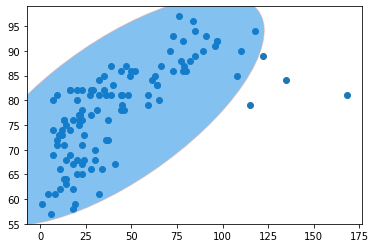

In [17]:
## Finding ellipse dimensions 
pearson = covariance[0, 1]/np.sqrt(covariance[0, 0] * covariance[1, 1])
rad_x = np.sqrt(1 + pearson)
rad_y = np.sqrt(1 - pearson)
lambda_, v = np.linalg.eig(C)
lambda_ = np.sqrt(lambda_)

# Ellipse patch
ellipse = patches.Ellipse(xy=(centerpoint[0], centerpoint[1]), width=lambda_[0]*np.sqrt(cutoff)*2, height=lambda_[1]*np.sqrt(cutoff)*2, angle=np.rad2deg(np.arccos(v[0, 0])), edgecolor='#fab1a0')
ellipse.set_facecolor('#0984e3')
ellipse.set_alpha(0.5)

fig = plt.figure()
ax = plt.subplot()
ax.add_artist(ellipse)
plt.scatter(df[: , 0], df[ : , 1])
plt.show()

### Credits & Links

https://towardsdatascience.com/multivariate-outlier-detection-in-python-e946cfc843b3